**Laboratorio II**  
**Inteligencia Artificial**   
**Andres Guillermo Velasquez Gomez**


El archivo ejemplo regresion.mat contiene los vectores x, y y t. En este ejemplo, x ∈ R (el espacio de entrada es unidimensional), los datos de entrada está agrupados en el vector x, los datos de salida sin ruido están agrupados en el vector y, y los datos de salida con ruido están agrupados en el vector t.
Usando validación cruzada de cinco particiones, evalúe el desempeño de los siguientes algoritmos de regresión en funcíon de M (el número de funciones base), N (el número de datos de entrenamiento), y φ(·) (el tipo de funcíon base),

* Regresión lineal con máxima verosimilitud.

* Regresión lineal con regularización cuadrática. 

* Regresión Bayesiana lineal. 

Reporte la media y desviación estándar de las cinco validaciones. La medida de desempeño es el error cuadrático medio.

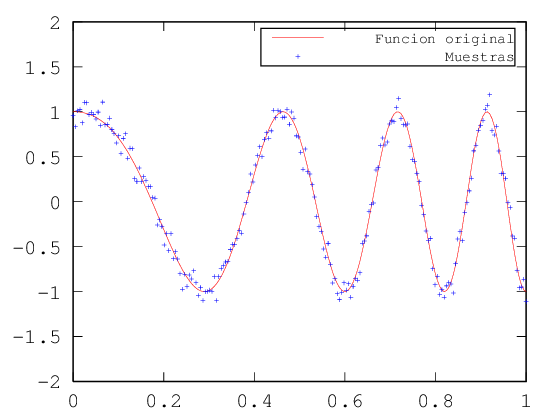

In [52]:
clear all
data=load('ejemplo_regresion.mat')
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;
plot(xNtot,yNtot,'r')
hold on
ylim([-2 2])
plot(xNtot,tNtot,'+','MarkerSize',2)
h_legend=legend('Funcion original','Muestras')
set(h_legend,'FontSize',7);


#Regresión Lineal con máxima verosimilitud

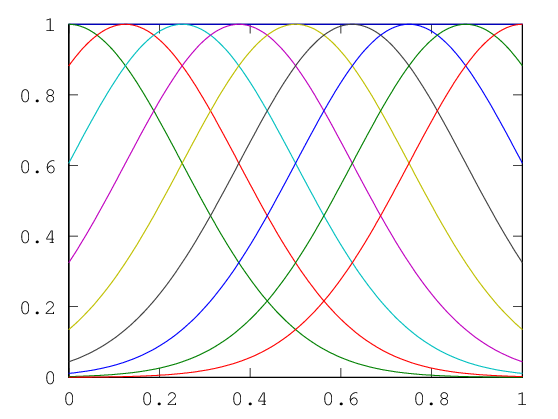

In [53]:
Ntot=size(xNtot,1);
N=100
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=10;
PHI=genBasisFunction(tipofb,xNtot,Ntot,M);
plot(xNtot, PHI, 'linewidth', 1.5)


Calculo de PHI para los datos de entrenamiento.

In [54]:
PHI_train=genBasisFunction(tipofb,x,N,M);

Se calcula la solucion de maxima verosimilitud para w y beta

In [55]:
Wml=inv(PHI_train'*PHI_train)*PHI_train'*t;
B=(1/N)*(t-PHI_train*Wml)'*(t-PHI_train*Wml);

Calculemos la prediccion sobre todo el espacio de entrada y se grafica

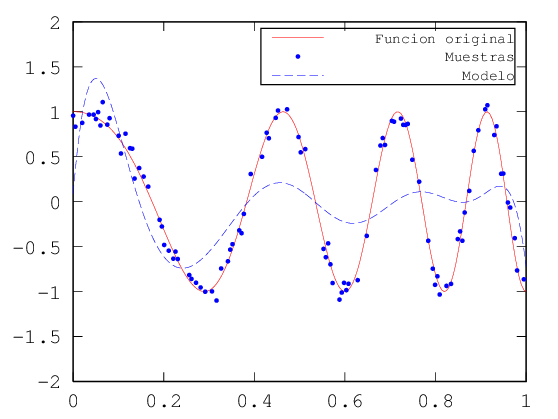

In [56]:
plot(xNtot, yNtot, 'r',x, t, '.b',xNtot,PHI*Wml,'--')
h_legend=legend('Funcion original','Muestras','Modelo')
set(h_legend,'FontSize',7);
ylim([-2 2])